# Credit Card Fraud Detection
Edric Franco <br>
  12/2018

In [1]:
%%capture
# Import Packages

# Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import pandas as pd
import zipfile

# Visualization
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis, PCA

# Models
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GMM
from keras.layers.normalization import BatchNormalization

import warnings

# Model Validation
from utils import plot_roc_multiple, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline
zf = zipfile.ZipFile('./data/creditcardfraud.zip') 
df = pd.read_csv(zf.open('creditcard.csv'))

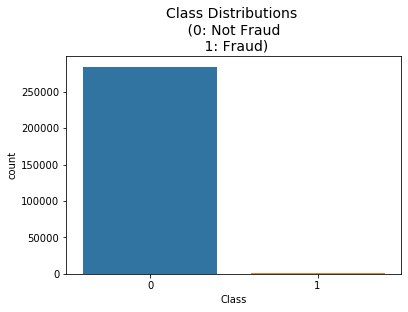

Number of not fraud cases: 284315
Number of fraud cases: 492


In [2]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: Not Fraud \n 1: Fraud)', fontsize=14)
plt.show()

num_not_fraud=sum(df['Class'] == 0)
num_fraud=sum(df['Class'] == 1)
print('Number of not fraud cases: {}'.format(num_not_fraud))
print('Number of fraud cases: {}'.format(num_fraud))

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploration

- We can see that the number of not fraud cases are way larger than those with fraud <br>
- We are dealing with an Imbalanced dataset

C:\Users\Edric\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


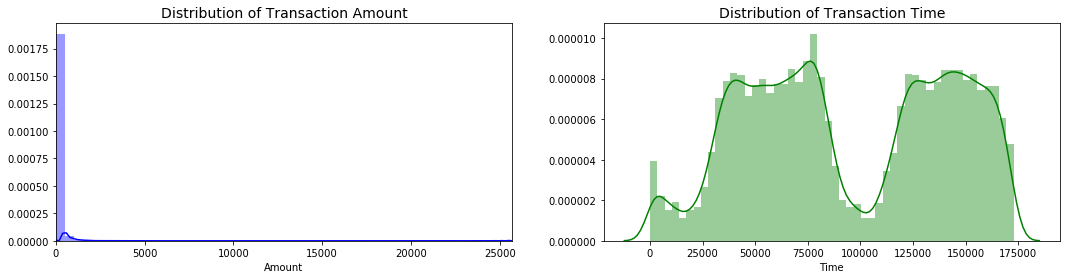

In [4]:
# Normalizing data to have equal contribution from each feature

fig, ax = plt.subplots(1, 2, figsize=(18,4))


sns.distplot(df['Amount'], ax=ax[0], color='blue')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([-1, max(df['Amount'])+1])

sns.distplot(df['Time'], ax=ax[1], color='green')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
# ax[1].set_xlim([-1, max(df['Time'])+1])

plt.show()

- It appears that the transactions usually happen in the middle of the day and it has 2 peaks
- There appears to be an outlier in transaction amount

In [5]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df_new = df.drop(['Time','Amount'], axis=1)
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


- Let us now perform undersampling to balance our data

In [6]:
df_f = df_new.loc[df_new['Class']==1]

n_fraud = len(df_f)

df_not_f = df_new.loc[df_new['Class']==0].sample(n=n_fraud, random_state=0)

balanced_df = pd.concat([df_f, df_not_f])
balanced_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648


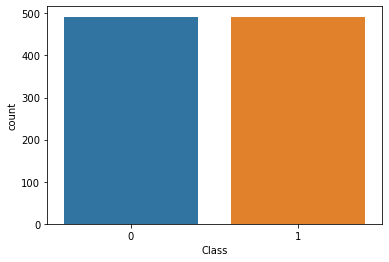

In [7]:
sns.countplot('Class', data=balanced_df)

Now that we have a balanced dataset, Let us try out some dimensionality reduction techniques <br> on the reduced dataset
for easier visualization:
- Factor Analysis
- PCA

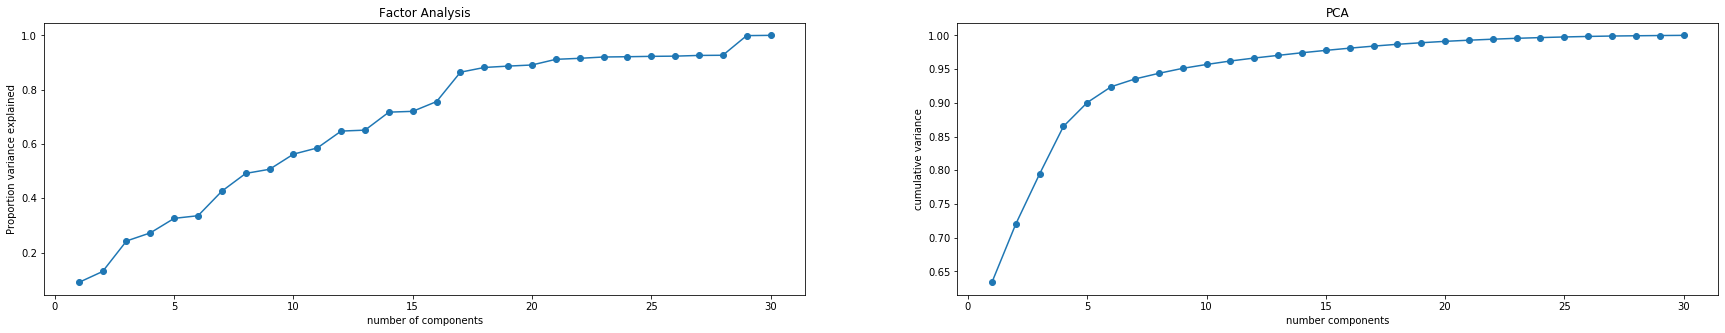

In [8]:
X = balanced_df.drop('Class', axis=1)
Y = balanced_df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,5))

# Using Factor Analysis
FA_model = FactorAnalysis(n_components=2)
FA_model.fit(x_train)
var_fa = np.diag(pd.DataFrame(FA_model.get_covariance()))
cum_var_fa = np.cumsum(var_fa)/sum(var_fa)

# Plot prop variance explained FA
ax1.plot(range(1, len(cum_var_fa)+1), cum_var_fa, marker='o')
ax1.set_xlabel('number of components')
ax1.set_ylabel('Proportion variance explained')
ax1.set_title('Factor Analysis')
X_FA = pd.DataFrame(FA_model.transform(x_train))

# Using PCA
PCA_model = PCA()
PCA_model.fit(x_train)
var=PCA_model.explained_variance_
cumulative_var = np.cumsum(var)/sum(var)

# Plot prof variance explained PCA
ax2.plot(range(1,len(var)+1), cumulative_var, marker='o')
ax2.set_xlabel('number components')
ax2.set_ylabel('cumulative variance')
ax2.set_title('PCA')
X_PCA = pd.DataFrame(PCA_model.transform(x_train))

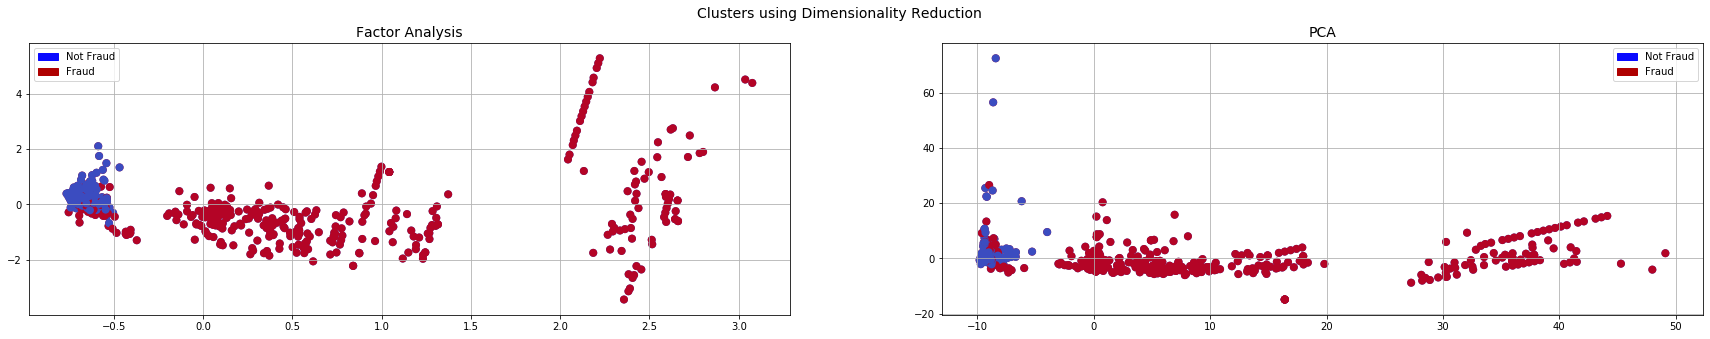

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,5))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# FA 2-D plot
ax1.scatter(X_FA.loc[:,0], X_FA.loc[:,1], c=(y_train == 0), cmap='coolwarm', label='Not Fraud', linewidths=2)
ax1.scatter(X_FA.loc[:,0], X_FA.loc[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('Factor Analysis', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA  2-D plot
ax2.scatter(X_PCA.loc[:,0], X_PCA.loc[:,1], c=(y_train == 0), cmap='coolwarm', label='Not Fraud', linewidths=2)
ax2.scatter(X_PCA.loc[:,0], X_PCA.loc[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

- Results from FA and PCA are both very similar and both evidently show the difference between Fraud and Not fraud transactions
- It Appears that majority of features are still useful in modeling Credit Card Default

# Model Bulding
Let us now try out different models:
- Logistic Regression
- SVM
- 3 Layer Neural Network

In [10]:
#################### Logistic Regression
LR_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Logistic_model = LogisticRegression()
grid_CV = GridSearchCV(Logistic_model, LR_params) # Tune Hyperparams
grid_CV.fit(x_train, y_train)

# Best Hyperparameters from our GridSearch
LR_Model=grid_CV.best_estimator_
pred_LR = LR_Model.predict(x_test)
acc=np.sum(pred_LR==y_test)/len(y_test) * 100
print('accuracy of Logistic Regression: {}'.format(acc))

accuracy of Logistic Regression: 95.93908629441624


In [11]:
#################### Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
model_SVC = SVC()
grid_svc = GridSearchCV(model_SVC, svc_params)
grid_svc.fit(x_train, y_train)

# Best Hyperparameters
SVC_Model = grid_svc.best_estimator_
pred_svc =  SVC_Model.predict(x_test)
acc=np.sum(pred_svc==y_test)/len(y_test) * 100

print('accuracy of SVC: {}'.format(acc))

accuracy of SVC: 94.9238578680203


In [12]:
#################### 3 Layer Neural Network
n_inputs = x_train.shape[1]

nn_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    BatchNormalization(),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 3,164
Trainable params: 3,104
Non-trainable params: 60
_________________________________________________________________


In [13]:
nn_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(x_train, y_train, validation_split=0.1, batch_size=30, epochs=20, shuffle=True, verbose=2)

Train on 708 samples, validate on 79 samples
Epoch 1/20
 - 1s - loss: 0.6224 - acc: 0.6992 - val_loss: 0.2848 - val_acc: 0.9241
Epoch 2/20
 - 0s - loss: 0.3473 - acc: 0.8616 - val_loss: 0.2304 - val_acc: 0.9241
Epoch 3/20
 - 0s - loss: 0.3054 - acc: 0.8927 - val_loss: 0.2169 - val_acc: 0.9494
Epoch 4/20
 - 0s - loss: 0.2463 - acc: 0.9054 - val_loss: 0.1992 - val_acc: 0.9494
Epoch 5/20
 - 0s - loss: 0.2357 - acc: 0.9082 - val_loss: 0.1893 - val_acc: 0.9494
Epoch 6/20
 - 0s - loss: 0.2275 - acc: 0.9138 - val_loss: 0.1888 - val_acc: 0.9367
Epoch 7/20
 - 0s - loss: 0.2115 - acc: 0.9237 - val_loss: 0.1853 - val_acc: 0.9367
Epoch 8/20
 - 0s - loss: 0.2046 - acc: 0.9209 - val_loss: 0.1827 - val_acc: 0.9494
Epoch 9/20
 - 0s - loss: 0.1853 - acc: 0.9280 - val_loss: 0.1774 - val_acc: 0.9494
Epoch 10/20
 - 0s - loss: 0.1883 - acc: 0.9280 - val_loss: 0.1689 - val_acc: 0.9241
Epoch 11/20
 - 0s - loss: 0.1900 - acc: 0.9237 - val_loss: 0.1713 - val_acc: 0.9241
Epoch 12/20
 - 0s - loss: 0.1823 - acc: 

In [14]:
nn_pred = nn_model.predict_classes(x_test, batch_size=200, verbose=0)
nn_pred == y_test
acc=np.sum(nn_pred==y_test)/len(y_test) * 100
print('Testing accuracy of 3-Layer Neural Network: {}'.format(acc))

Testing accuracy of 3-Layer Neural Network: 96.44670050761421


# Validation

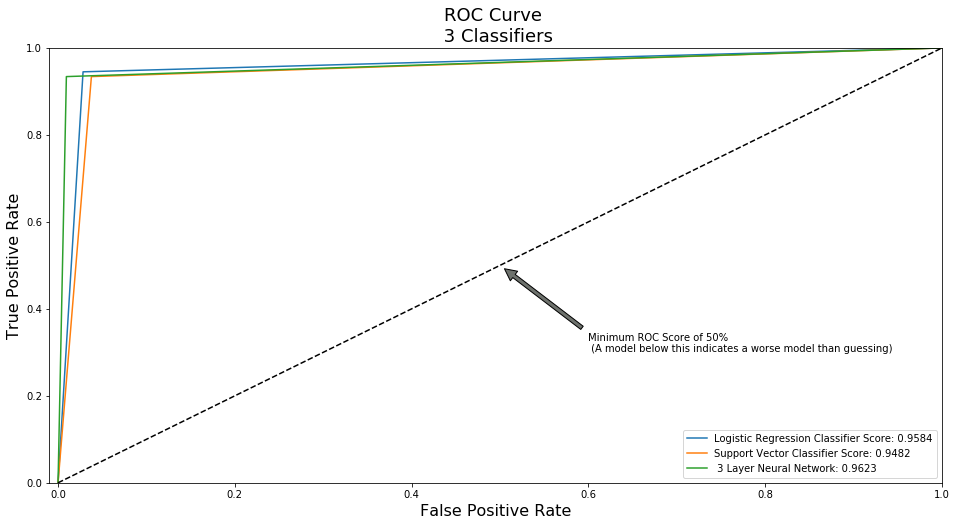

In [15]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, pred_LR)
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_test, pred_svc)
nn_fpr, nn_tpr, nn_thresold = roc_curve(y_test, nn_pred)

plot_roc_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr,
                   nn_fpr, nn_tpr, y_test, pred_LR, pred_svc, nn_pred)

In [16]:
print('Logistic Regression:')
print(classification_report(y_test, pred_LR))
print('---'*20)
print('Support Vector Classifier:')
print(classification_report(y_test, pred_svc))
print('---'*20)
print('3 Layer Neural Network:')
print(classification_report(y_test, nn_pred))

Logistic Regression:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       106
          1       0.97      0.95      0.96        91

avg / total       0.96      0.96      0.96       197

------------------------------------------------------------
Support Vector Classifier:
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       106
          1       0.96      0.93      0.94        91

avg / total       0.95      0.95      0.95       197

------------------------------------------------------------
3 Layer Neural Network:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       106
          1       0.99      0.93      0.96        91

avg / total       0.97      0.96      0.96       197



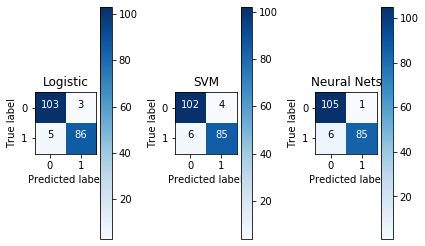

In [17]:
plt.subplot(1, 3, 1)
conf_mat_LR = confusion_matrix(y_test,pred_LR)
plot_confusion_matrix(conf_mat_LR
                      , classes=[0,1]
                      , title='Logistic')

plt.subplot(1, 3, 2)
conf_mat_SVC = confusion_matrix(y_test,pred_svc)
plot_confusion_matrix(conf_mat_SVC
                      , classes=[0,1]
                      , title='SVM')

plt.subplot(1, 3, 3)
conf_mat_nn = confusion_matrix(y_test, nn_pred)
plot_confusion_matrix(conf_mat_nn
                      , classes=[0,1]
                      , title='Neural Nets')

- From our model validation, it seems that a 3 Layer Neural Network is a good model for Credit Card Fraud Detection
- 3 Layer neural network has the best f1, recall, precision and accuracy score overall
- From confusion matrix, the model also shows a low false positive and true negative test error rate which is ideal for Fraud Detection

# Extra
- There are some cases where Fraud Detection does not have any labels
- Let us Try to fit an Unsupervised Model and compare

In [18]:
Y = df['Class']
X = df.drop('Class', axis=1)

model = PCA(n_components=2, random_state=42)
X_pc = pd.DataFrame(model.fit_transform(X), columns=['pc1', 'pc2'])

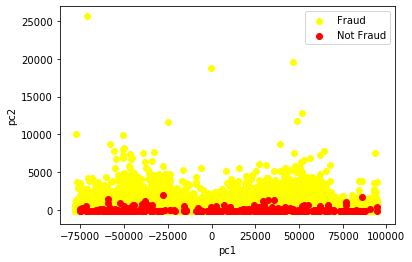

In [19]:
plt.scatter(X_pc['pc1'].loc[Y==0], X_pc['pc2'].loc[Y==0], c='yellow', label='Fraud')
plt.scatter(X_pc['pc1'].loc[Y==1], X_pc['pc2'].loc[Y==1], c='red', label='Not Fraud')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(['Fraud', 'Not Fraud'])

Fraud cases appear to follow a Gaussian distribution
- Let us now apply Gaussian mixture model

The 2 principal Components will now be used as features for 
our Gaussian Mixture Model. <br>
Gaussian Mixture Model seems to be a good model for this
since we Fraud Cases appear to follow a gaussian distribution

Text(0.5, 1.0, 'Clustered Classes by Gaussian mixture model')

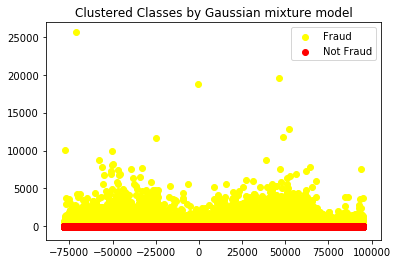

In [20]:
warnings.filterwarnings('ignore')
gmm = GMM(n_components=2).fit(X_pc)
labels = gmm.predict(X_pc)
plt.scatter(X_pc['pc1'].loc[labels==0], X_pc['pc2'].loc[labels==0], c='yellow', label='Fraud')
plt.scatter(X_pc['pc1'].loc[labels==1], X_pc['pc2'].loc[labels==1], c='red', label='Not Fraud')
plt.legend(['Fraud', 'Not Fraud'])
plt.title('Clustered Classes by Gaussian mixture model')

In [21]:
FN = sum(labels[Y==1] == 0)/ sum(Y==1) * 100
print('Percentage of Fraud cases labeled as not Fraud: {} %'.format(FN))

Percentage of Fraud cases labeled as not Fraud: 25.609756097560975 %


In [22]:
pred_nfraud  = X_pc.loc[labels==0]
pred_fraud =  X_pc.loc[labels==1]

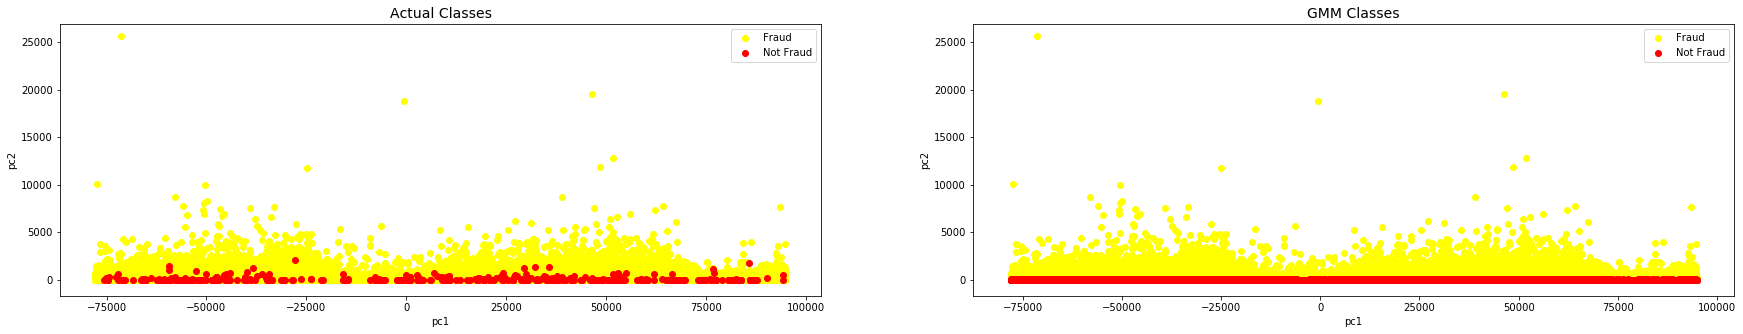

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,5))
ax1.scatter(X_pc['pc1'].loc[Y==0], X_pc['pc2'].loc[Y==0], c='yellow', label='Fraud')
ax1.scatter(X_pc['pc1'].loc[Y==1], X_pc['pc2'].loc[Y==1], c='red', label='Not Fraud')
ax1.set_xlabel('pc1')
ax1.set_ylabel('pc2')
ax1.set_title('Actual Classes', fontsize=14)
ax1.legend(['Fraud', 'Not Fraud'])

ax2.scatter(X_pc['pc1'].loc[labels==0], X_pc['pc2'].loc[labels==0], c='yellow', label='Fraud')
ax2.scatter(X_pc['pc1'].loc[labels==1], X_pc['pc2'].loc[labels==1], c='red', label='Not Fraud')
ax2.set_xlabel('pc1')
ax2.set_ylabel('pc2')
ax2.set_title('GMM Classes', fontsize=14)
ax2.legend(['Fraud', 'Not Fraud'])

With an Unsupervised model, we were not able to get as good an accuracy as the previous models used <br>
However, it is still good as a first filter for Fraud Detection as it detects almost all False Negative Cases